In [307]:
import gym

import mdptoolbox, mdptoolbox.example

import time

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt 

from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp

from itertools import accumulate
import math

from platform import python_version

print(python_version())

import hiive.mdptoolbox as mdptoolbox
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from IPython.display import clear_output, display

# suppress pandas warning
pd.options.mode.chained_assignment = None

# set seed
np.random.seed(0)

%matplotlib inline

3.9.7


### Forest Problem (Non GridWorld Example)

- Creates transition probability P, size (Action X State X State)
- Creates Reward Matrix R, size (State X Action)
- Action is either WAIT (Action = 0) or CUT (Action = 1). There is some probability p that the fire burns the forest. 
- The states of the forest are the ages of how old the forest is since last cut or burn, where S = {0, 1, ..., S-1}

- S: The number of states, the number of years old the forest can be 
- r1: the reward when the forest is in its oldest state and action WAIT is performed 
- r2: the reward whne the forest is in its oldest state and action CUT is performed
- p: the probability that a wild fire occurs 

State Size 500

In [308]:
# https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

P, R = hiive.mdptoolbox.example.forest(S = 500, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

# V (tuple) – value function 
# policy (tuple) – optimal policy : Tuple shows which action maximizes the value in this state
# iter (int) – number of done iterations
# time (float) – used CPU time

# Use Policy Iteration on the Forest MDP https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.8) # P = Transitions, R = Reward, 0.9 = Discount
pi_result = pi.run()
pi.setVerbose()
print(pi.policy)
print(pi.V)
# print(pi_result)

# Use Value Iteration on the Forest MDP https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.8)
vi_result = vi.run()
#print(vi.policy)

# Q-learning

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.8)
# ql_result = ql.run()
#print(ql.policy)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [309]:
# print(P[0, :, :]) # Probability that if we take action 0, in a given state, which state we land in

In [310]:
# Take action 0, while in State 0, and end up with these transition probabilities to these states: 10% to 0, 90% to state 1
P[0, 0, :] 

array([0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

Policy Iteration Final Iteration

In [311]:
pi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 14.883720930232563,
 'Error': 8.881784197001252e-16,
 'Time': 0.02626514434814453,
 'Max V': 14.883720930232563,
 'Mean V': 2.736163965380467,
 'Iteration': 6}

In [312]:
vi_result

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0001590251922607422,
  'Max V': 4.0,
  'Mean V': 1.004,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 6.880000000000001,
  'Error': 2.880000000000001,
  'Time': 0.00036597251892089844,
  'Max V': 6.880000000000001,
  'Mean V': 1.01496,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.011200000000002,
  'Error': 2.0736000000000017,
  'Time': 0.0005931854248046875,
  'Max V': 9.011200000000002,
  'Mean V': 1.5972544000000002,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 10.550272000000001,
  'Error': 1.492992,
  'Time': 0.00077056884765625,
  'Max V': 10.550272000000001,
  'Mean V': 1.6530388480000002,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 11.691950080000002,
  'Error': 1.0749542400000012,
  'Time': 0.0009403228759765625,
  'Max V': 11.691950080000002,
  'Mean V': 1.994362680320001,
  'Iteration': 5},
 {'State': None,
  'A

Value Iteration Final Iteration

In [313]:
vi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 14.863208550459333,
 'Error': 0.002906530688611575,
 'Time': 0.004255533218383789,
 'Max V': 14.863208550459333,
 'Mean V': 2.722262455861611,
 'Iteration': 23}

Q Learning Final Iteration

In [314]:
ql_result[-1]

{'State': 5,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 265.30939745903015,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.8,
 'Max V': 1.6662262668208898,
 'Mean V': 0.24914556428375606,
 'Iteration': 5000000}

In [315]:
def chart_reward_iter(results, title):
    iter_list = []
    result_list = []

    for i in range(0, len(results)):
        iter_list.append(results[i]['Iteration'])
        result_list.append(results[i]['Reward'])

    plt.plot(iter_list, result_list)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title(title)
    plt.show()

In [316]:
def compare_reward1(pi, vi, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_meanv_list = []
    pi_time_list = []
   
    vi_iter_list = []
    vi_reward_list = []
    vi_meanv_list = []
    vi_time_list = []
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_meanv_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_meanv_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Max Reward")
    plt.title("Iteration vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Max Reward")
    plt.title("Time vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Time vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show() 
    
    plt.clf()
    plt.plot(pi_iter_list, pi_cumsum_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_cumsum_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Time")
    plt.title("Iteration vs. Cumulative Time in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    
    

In [317]:
def compare_reward(pi, vi, ql, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_meanv_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_meanv_list = []
    vi_time_list = []
    
    ql_iter_list = []
    ql_reward_list = []
    ql_meanv_list = []
    ql_time_list = []
    
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        pi_reward_list.append(pi[i]['Reward'])
        pi_meanv_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        vi_reward_list.append(vi[i]['Reward'])
        vi_meanv_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    for i in range(0, len(ql)):
        ql_iter_list.append(ql[i]['Iteration'])
        ql_reward_list.append(ql[i]['Reward'])
        ql_meanv_list.append(ql[i]['Mean V'])
        ql_time_list.append(ql[i]['Time'])
    ql_cumsum_list = list(accumulate(ql_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Max Reward")
    plt.title("Iteration vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Max Reward")
    plt.title("Time vs. Max Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Time vs. Mean Reward in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show() 
    
    plt.clf()
    plt.plot(pi_iter_list, pi_cumsum_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_cumsum_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cumulative Time")
    plt.title("Iteration vs. Cumulative Time in Policy and Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_iter_list, ql_reward_list, label = "Q Learning Max Reward")
    plt.plot(ql_iter_list, ql_meanv_list, label = "Q Learning Mean Reward")
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("Iteration vs. Reward in Q Learning \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_iter_list, ql_meanv_list, label = "Q Learning")
    plt.plot(pi_iter_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Reward")
    plt.title("Iteration vs. Mean Reward in Q Learning, Policy, Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(ql_time_list, ql_meanv_list, label = "Q Learning")
    plt.plot(pi_time_list, pi_meanv_list, label = "Policy Iteration")
    plt.plot(vi_time_list, vi_meanv_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Mean Reward")
    plt.title("Cumulative Time vs. Mean Reward in Q Learning, Policy, Value Iteration \n for " + str(num_states) + " States and " 
             + str(discount_rate) + " Discount Rate " + "\n in " + title)
    plt.legend()
    plt.show()

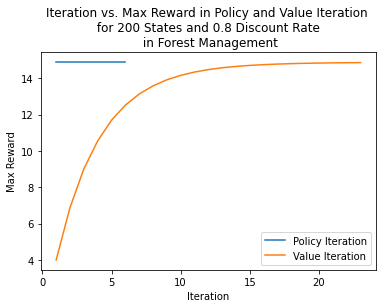

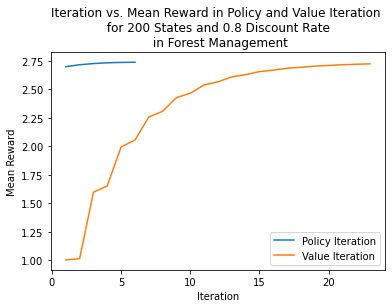

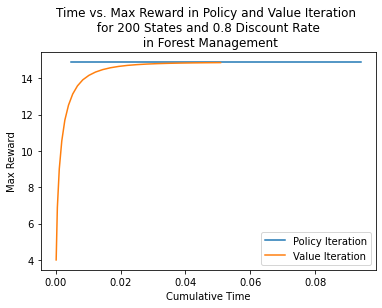

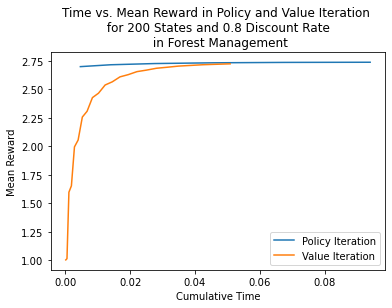

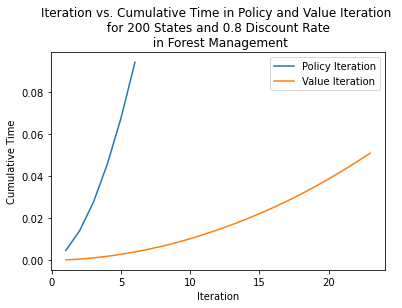

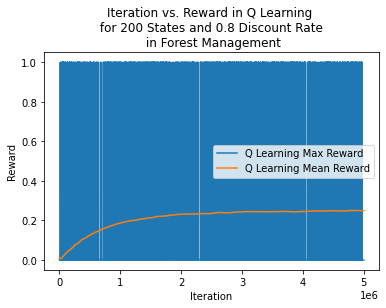

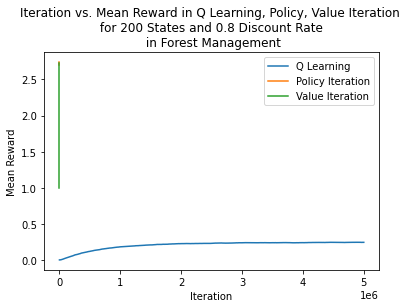

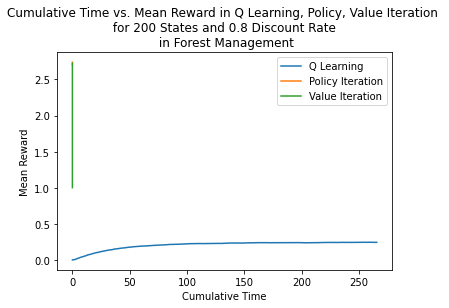

In [318]:
compare_reward(pi_result, vi_result, ql_result, 200, .80, "Forest Management")

In [320]:
print("Policy Iteration", pi_result[-1]['Iteration'])
print("Value Iteration", vi_result[-1]['Iteration'])

Policy Iteration 6
Value Iteration 23


In [321]:
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))

time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))


Policy Iteration Time: 0.0939798355102539
Value Iteration Time: 0.050830841064453125


In [322]:
vi.policy == pi.policy

True

In [323]:
print("Policy Iteration", pi_result[-1]['Reward'])
print("Value Iteration", vi_result[-1]['Reward'])

Policy Iteration 14.883720930232563
Value Iteration 14.863208550459333


Policy Iteration: {'State': None, 'Action': None, 'Reward': 14.883720930232563, 'Error': 4.440892098500626e-16, 'Time': 0.00932931900024414, 'Max V': 14.883720930232563, 'Mean V': 2.8287820064744205, 'Iteration': 6}
Value Iteartion: {'State': None, 'Action': None, 'Reward': 14.863208550459333, 'Error': 0.002906530688611575, 'Time': 0.0032739639282226562, 'Max V': 14.863208550459333, 'Mean V': 2.8147591324008814, 'Iteration': 23}
QLearning: {'State': 166, 'Action': 0, 'Reward': 0.0, 'Error': 3.97722462972726e-05, 'Time': 0.7729079723358154, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.8, 'Max V': 2.1413284833273076, 'Mean V': 0.024772768347785253, 'Iteration': 10000}


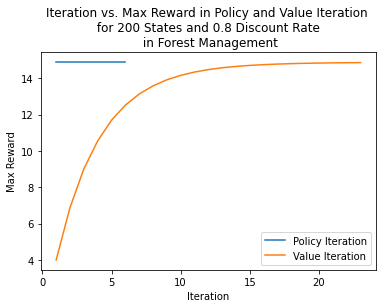

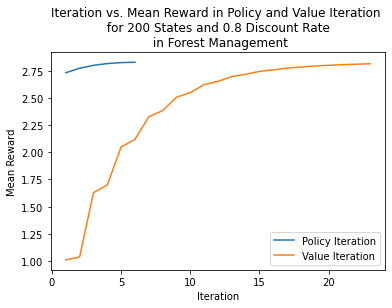

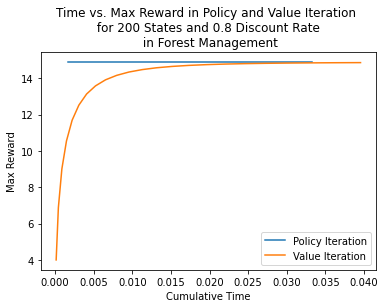

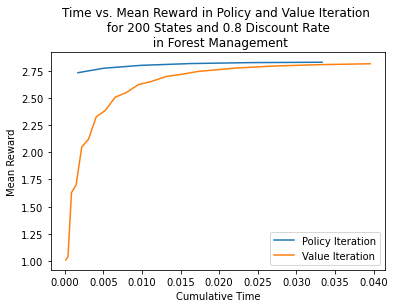

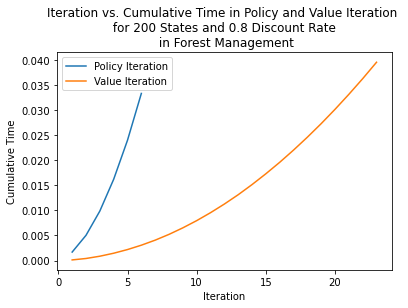

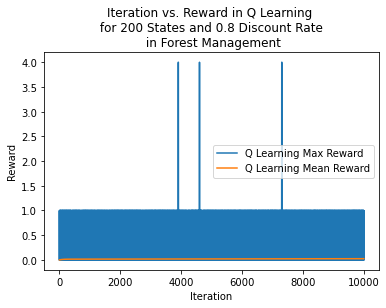

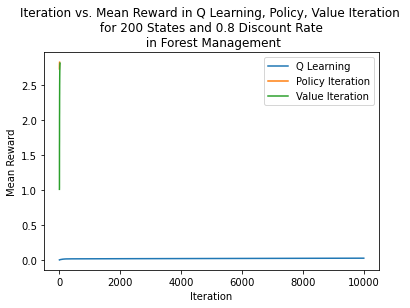

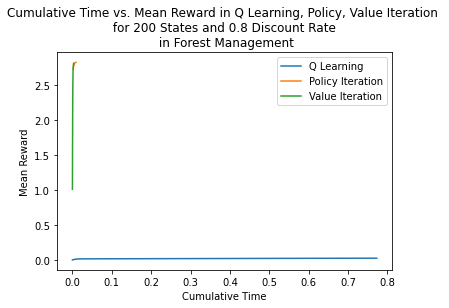

In [324]:
gamma = 0.80
numstates = 200

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(transitions = P, reward = R, gamma = gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteartion:",vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000)
ql_result = ql.run()
print("QLearning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")




Policy Iteration: {'State': None, 'Action': None, 'Reward': 14.883720930232563, 'Error': 8.881784197001252e-16, 'Time': 0.026044845581054688, 'Max V': 14.883720930232563, 'Mean V': 2.736163965380467, 'Iteration': 6}
Value Iteartion: {'State': None, 'Action': None, 'Reward': 14.863208550459333, 'Error': 0.002906530688611575, 'Time': 0.004168033599853516, 'Max V': 14.863208550459333, 'Mean V': 2.722262455861611, 'Iteration': 23}
QLearning: {'State': 435, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.9954352378845215, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.8, 'Max V': 2.0923337820615755, 'Mean V': 0.009635677304847389, 'Iteration': 10000}


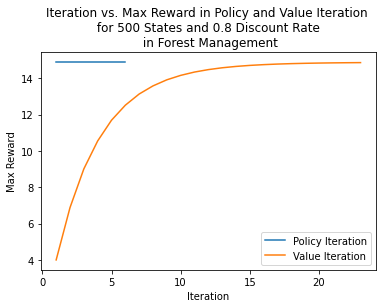

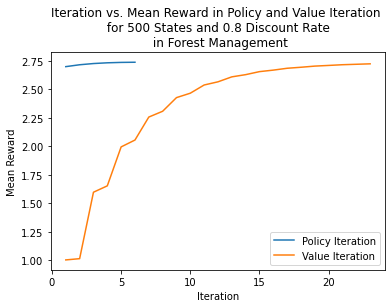

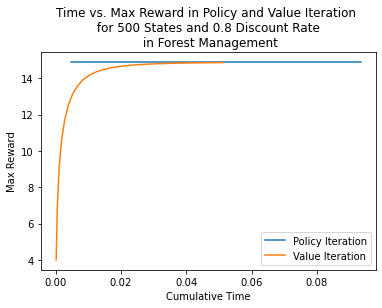

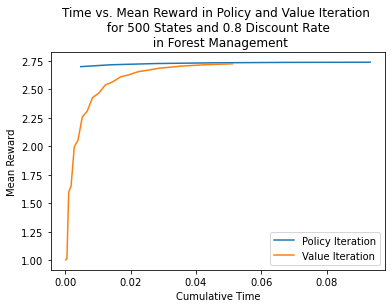

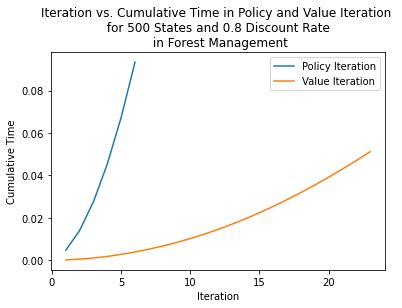

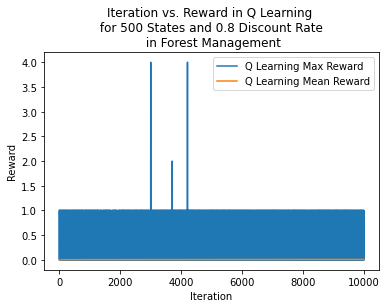

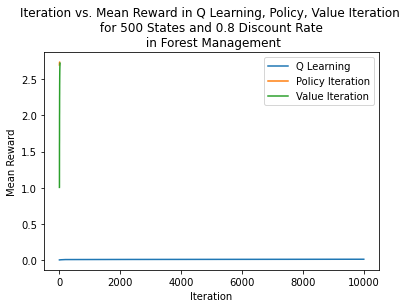

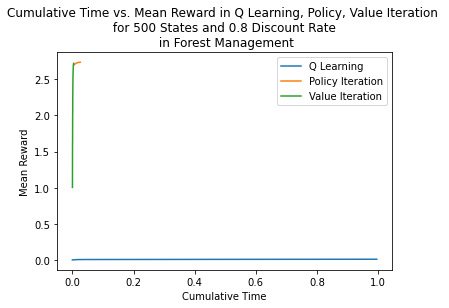

In [325]:
gamma = 0.80
numstates = 500

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(transitions = P, reward = R, gamma = gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteartion:",vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000)
ql_result = ql.run()
print("QLearning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")



In [ ]:
numstates = 1000
gamma = 0.80

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteration:", vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000000)
ql_result = ql.run()
print("Q Learning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")


Policy Iteration: {'State': None, 'Action': None, 'Reward': 14.883720930232563, 'Error': 4.440892098500626e-16, 'Time': 0.105987548828125, 'Max V': 14.883720930232563, 'Mean V': 2.705291285015816, 'Iteration': 6}
Value Iteration: {'State': None, 'Action': None, 'Reward': 14.863208550459333, 'Error': 0.002906530688611575, 'Time': 0.008749723434448242, 'Max V': 14.863208550459333, 'Mean V': 2.691430230348521, 'Iteration': 23}


Forest on 10,000 States

In [ ]:
numstates = 5000
gamma = 0.80

P, R = hiive.mdptoolbox.example.forest(S = numstates, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, gamma)
pi_result = pi.run()
print("Policy Iteration:", pi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
vi_result = vi.run()
print("Value Iteration:", vi_result[-1])

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000000)
ql_result = ql.run()
print("Q Learning:", ql_result[-1])

compare_reward(pi_result, vi_result, ql_result, numstates, gamma, "Forest Management")


Policy & Value Iteration: Gamma Tuning

In [ ]:
P, R = hiive.mdptoolbox.example.forest(S = 200, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

#learning_rates = np.arange(0.80, 1.0, 0.05)
gammas = np.arange(0.80, 1.0, 0.05)

pi_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
ql_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}


for gamma in gammas:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, gamma)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, gamma)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
        
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    pi_LR_dict_FM['Gamma'].append(gamma)
    pi_LR_dict_FM['Iteration'].append(pi_iter_list)
    pi_LR_dict_FM['rewards'].append(pi_reward_list)
    pi_LR_dict_FM['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FM['Max V'].append(pi_max_v_list)
    pi_LR_dict_FM['Error'].append(pi_error_list)
    pi_LR_dict_FM['Time'].append(pi_time_list)
    
    vi_LR_dict_FM['Gamma'].append(gamma)
    vi_LR_dict_FM['Iteration'].append(vi_iter_list)
    vi_LR_dict_FM['rewards'].append(vi_reward_list)
    vi_LR_dict_FM['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FM['Max V'].append(vi_max_v_list)
    vi_LR_dict_FM['Error'].append(vi_error_list)
    vi_LR_dict_FM['Time'].append(vi_time_list)
    
    ql_LR_dict_FM['Gamma'].append(gamma)
    ql_LR_dict_FM['Iteration'].append(ql_iter_list)
    ql_LR_dict_FM['rewards'].append(ql_reward_list)
    ql_LR_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FM['Max V'].append(ql_max_v_list)
    ql_LR_dict_FM['Error'].append(ql_error_list)
    ql_LR_dict_FM['Time'].append(ql_time_list)

Q-Learning: Gamma Tuning

In [ ]:
P, R = hiive.mdptoolbox.example.forest(S = 200, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)
gammas = np.arange(0.80, 1.0, 0.05)

ql_LR_dict_FM = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}

for gamma in gammas:

    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 10000)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    ql_LR_dict_FM['Gamma'].append(gamma)
    ql_LR_dict_FM['Iteration'].append(ql_iter_list)
    ql_LR_dict_FM['rewards'].append(ql_reward_list)
    ql_LR_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FM['Max V'].append(ql_max_v_list)
    ql_LR_dict_FM['Error'].append(ql_error_list)
    ql_LR_dict_FM['Time'].append(ql_time_list)

Q - Learning : Alpha Tuning

In [ ]:
P, R = hiive.mdptoolbox.example.forest(S = 200, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)
           
gamma = .80
alphas = [0.01, 0.10, 0.30]
apha_results = []

ql_alpha_dict_FM = {
    'Alpha' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[],
    'Result':[],
    'AlphaList':[],
    'EpsilonList':[]
}

for alpha in alphas:
    print("alpha:", alpha)
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, n_iter = 5000000, alpha = alpha)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    ql_result_list = []
    ql_alpha_list = []
    ql_epsilon_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
        ql_alpha_list.append(ql_result[i]['Alpha'])
        ql_epsilon_list.append(ql_result[i]['Epsilon'])
        
    
    ql_alpha_dict_FM['Alpha'].append(alpha)
    ql_alpha_dict_FM['Iteration'].append(ql_iter_list)
    ql_alpha_dict_FM['rewards'].append(ql_reward_list)
    ql_alpha_dict_FM['Mean V'].append(ql_mean_v_list)
    ql_alpha_dict_FM['Max V'].append(ql_max_v_list)
    ql_alpha_dict_FM['Error'].append(ql_error_list)
    ql_alpha_dict_FM['Time'].append(ql_time_list)
    ql_alpha_dict_FM['AlphaList'].append(ql_alpha_list)
    ql_alpha_dict_FM['EpsilonList'].append(ql_epsilon_list)

Policy Iteration

In [ ]:
def plot_parameter_tuning(results, hyperparam, x_var, y_var, title):
    
    for i in range(0, len(results[hyperparam])):
        label = results[hyperparam][i]
        label = np.around(label, 2)
        label = '{:.1%}'.format(label)
        
        x = results[x_var][i]
        y = results[y_var][i]
        if y_var == "Time":
            y = list(accumulate(y))
        plt.plot(x, y, label = label)

    plt.title("The Effect of " + hyperparam + " on " + y_var + " over " + x_var +"\n" + title)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title = hyperparam, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', fancybox=True)
    plt.show()


In [ ]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Policy Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Time", "Policy Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Error", "Policy Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FM, "Gamma", "Iteration", "Max V", "Policy Iteration on Forest Management")

Value Iteration

In [ ]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Value Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Error", "Value Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Time", "Value Iteration on Forest Management")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FM, "Gamma", "Iteration", "Max V", "Value Iteration on Forest Management")

Q-Learning

In [ ]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Mean V", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Max V", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Time", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FM, "Gamma", "Iteration", "Error", "Q Learning on Forest Management")

Q - Learning Alpha

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Mean V", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Max V", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Time", "Q Learning on Forest Management")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FM, "Alpha", "Iteration", "Error", "Q Learning on Forest Management")

### Frozen Lake (Grid World Problem)

In [ ]:
    """
    Winter is here. You and your friends were tossing around a frisbee at the
    park when you made a wild throw that left the frisbee out in the middle of
    the lake. The water is mostly frozen, but there are a few holes where the
    ice has melted. If you step into one of those holes, you'll fall into the
    freezing water. At this time, there's an international frisbee shortage, so
    it's absolutely imperative that you navigate across the lake and retrieve
    the disc. However, the ice is slippery, so you won't always move in the
    direction you intend.
    The surface is described using a grid like the following
        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.
    """

In [ ]:
colors = {
    b'S': 'g',
    b'F': 'w',
    b'H': 'k',
    b'G': 'r'
}

directions = {
            0: '←',
            1: '↓',
            2: '→',
            3: '↑'
}

def plot_lake(env, policy=None, title='Frozen Lake'):
    squares = env.nrow
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, xlim=(-.01, squares+0.01), ylim=(-.01, squares+0.01))
    plt.title(title, fontsize=16, weight='bold', y=1.01)
    for i in range(squares):
        for j in range(squares):
            y = squares - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1, linewidth=1, edgecolor='k')
            p.set_facecolor(colors[env.desc[i,j]])
            ax.add_patch(p)
            
            if policy is not None:
                text = ax.text(x+0.5, y+0.5, directions[policy[i, j]],
                               horizontalalignment='center', size=25, verticalalignment='center',
                               color='k')
            
    plt.axis('off')
    
#plot_lake(env, policy)

In [ ]:
# code based on:
# https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
def get_score(env, policy, printInfo=False, episodes=1000):
    misses = 0
    steps_list = []
    for episode in range(episodes):
        observation = env.reset()
        steps=0
        while True:
            action = policy[observation]
            observation, reward, done, _ = env.step(action)
            steps+=1
            if done and reward == 1:
                # print('You have got the Frisbee after {} steps'.format(steps))
                steps_list.append(steps)
                break
            elif done and reward == 0:
                # print("You fell in a hole!")
                misses += 1
                break
    ave_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)
    pct_fail  = (misses/episodes)* 100
    
    if (printInfo):
        print('----------------------------------------------')
        print('You took an average of {:.0f} steps to get the frisbee'.format(ave_steps))
        print('And you fell in the hole {:.2f} % of the times'.format(pct_fail))
        print('----------------------------------------------')
  
    return ave_steps, std_steps, pct_fail


In [ ]:
# code based on:
# https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
def get_policy(env,stateValue, lmbda=0.9):
    policy = [0 for i in range(env.nS)]
    for state in range(env.nS):
        action_values = []
        for action in range(env.nA):
            action_value = 0
            for i in range(len(env.P[state][action])):
                prob, next_state, r, _ = env.P[state][action][i]
                action_value += prob * (r + lmbda * stateValue[next_state])
            action_values.append(action_value)
        best_action = np.argmax(np.asarray(action_values))
        policy[state] = best_action
    return policy 

In [ ]:
# Setup 4x4
env = gym.make('FrozenLake-v1').unwrapped

# Create transition and reward matrices from OpenAI P matrix
rows = env.nrow
cols = env.ncol
T = np.zeros((4, rows*cols, rows*cols))
R = np.zeros((4, rows*cols, rows*cols))

old_state = np.inf

for square in env.P:
    for action in env.P[square]:
        for i in range(len(env.P[square][action])):
            new_state = env.P[square][action][i][1]
            if new_state == old_state:
                T[action][square][env.P[square][action][i][1]] = T[action][square][old_state] + env.P[square][action][i][0]
                R[action][square][env.P[square][action][i][1]] = R[action][square][old_state] + env.P[square][action][i][2]
            else:
                T[action][square][env.P[square][action][i][1]] = env.P[square][action][i][0]
                R[action][square][env.P[square][action][i][1]] = env.P[square][action][i][2]
            old_state = env.P[square][action][i][1]


In [ ]:
# Create the Frozen Lake Environment 

env = gym.make("FrozenLake-v1", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .80
pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
print("PI Final Result:",pi_result[-1])

policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))
reshaped_array_p = policy_arry.reshape(4, 4)

title='Frozen Lake QL Optimal Policy from PI'
plot_lake(env, reshaped_array_p, title)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
vi_result = vi.run()
print("VI Final Result:", vi_result[-1])

# Value_tup = vi.policy
# value_arry = np.array(list(value_tup))
# reshaped_array_v = policy_arry.reshape(4, 4)

# title='Frozen Lake QL Optimal Policy from VI'
# plot_lake(env, reshaped_array_v, title)


ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
ql_result = ql.run()
print("QL Final Result:", ql_result[-1])

####################

compare_reward(pi_result, vi_result, ql_result, n_states, gamma, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

print("The policy:")
print(pi.policy)
board_size = math.sqrt(n_states)
board_size = int(board_size)

policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

# title='Frozen Lake QL Optimal Policy from PI'
# plot_lake(env, reshaped_array, title)

ax.set_xticks(())
ax.set_yticks(())
ax.set_xticklabels(())
ax.set_yticklabels(())
fig, ax = plt.subplots()
im = ax.imshow(reshaped_array)

# Loop over data dimensions and create text annotations.
for i in range(0, board_size):
    for j in range(0, board_size):
        text = ax.text(j, i, reshaped_array[i, j],
                       ha="center", va="center", color="w") 
plt.title("Model Based Policy for Frozen Lake")
plt.show()

# print(reshaped_array)

# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_xticklabels(())
# ax.set_yticklabels(())
# fig, ax = plt.subplots()
# im = ax.imshow(reshaped_array)

# # Loop over data dimensions and create text annotations.
# for i in range(0, board_size):
#     for j in range(0, board_size):
#         text = ax.text(j, i, reshaped_array[i, j],
#                        ha="center", va="center", color="w") 
# plt.title("Model Free Policy for Frozen Lake")
# plt.show()

In [ ]:
env = gym.make("FrozenLake-v1",is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.8)
pi_result = pi.run()
pi.setVerbose()
print(pi.policy)

title='Frozen Lake QL Optimal Policy'
plot_lake(env, reshaped_array, title)

#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.8)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, 0.8, n_iter = 5000000)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, ql_result, n_states, 0.8, "Frozen Lake")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

print("The policy:")
print(pi.policy)


policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))
# reshaped_array = policy_arry.reshape(board_size, board_size)
# print(reshaped_array)

reshaped_array = policy_arry.reshape(4, 4)
reshaped_array
title='Frozen Lake QL Optimal Policy from QI'
plot_lake(env, reshaped_array, title)


In [ ]:
policy_tup = pi.policy
policy_arry = np.array(list(policy_tup))

reshaped_array = policy_arry.reshape(4, 4)
reshaped_array
title='Frozen Lake QL Optimal Policy from PI'
plot_lake(env, reshaped_array, title)

In [ ]:
policy_tup = vi.policy
policy_arry = np.array(list(policy_tup))

reshaped_array = policy_arry.reshape(4, 4)
reshaped_array
title='Frozen Lake QL Optimal Policy from VI'
plot_lake(env, reshaped_array, title)

In [ ]:
policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))

reshaped_array = policy_arry.reshape(4, 4)
reshaped_array
title='Frozen Lake QL Optimal Policy from QL'
plot_lake(env, reshaped_array, title)

#### Make Dictionary of Parameter Tuning

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

#learning_rates = np.arange(0.90, 1.0, 0.01)
gammas = np.arange(0.80, 1.0, 0.05)

pi_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}
for gamma in gammas:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_max_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_max_v_list = []
    vi_error_list = []
    vi_time_list = []

    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_max_v_list.append(pi_result[i]['Max V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_max_v_list.append(vi_result[i]['Max V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
    
    pi_LR_dict_FL['Gamma'].append(gamma)
    pi_LR_dict_FL['Iteration'].append(pi_iter_list)
    pi_LR_dict_FL['rewards'].append(pi_reward_list)
    pi_LR_dict_FL['Mean V'].append(pi_mean_v_list)
    pi_LR_dict_FL['Max V'].append(pi_max_v_list)
    pi_LR_dict_FL['Error'].append(pi_error_list)
    pi_LR_dict_FL['Time'].append(pi_time_list)
    
    
    vi_LR_dict_FL['Gamma'].append(gamma)
    vi_LR_dict_FL['Iteration'].append(vi_iter_list)
    vi_LR_dict_FL['rewards'].append(vi_reward_list)
    vi_LR_dict_FL['Mean V'].append(vi_mean_v_list)
    vi_LR_dict_FL['Max V'].append(vi_max_v_list)
    vi_LR_dict_FL['Error'].append(vi_error_list)
    vi_LR_dict_FL['Time'].append(vi_time_list)
    
    

Parameter Dict for Q Learner 

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery = True)
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward

gammas = np.arange(0.80, 1.0, 0.05)

ql_LR_dict_FL = {
    'Gamma' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[]
}

for gamma in gammas:

    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
    
    ql_LR_dict_FL['Gamma'].append(gamma)
    ql_LR_dict_FL['Iteration'].append(ql_iter_list)
    ql_LR_dict_FL['rewards'].append(ql_reward_list)
    ql_LR_dict_FL['Mean V'].append(ql_mean_v_list)
    ql_LR_dict_FL['Max V'].append(ql_max_v_list)
    ql_LR_dict_FL['Error'].append(ql_error_list)
    ql_LR_dict_FL['Time'].append(ql_time_list)

Value Iteration

In [ ]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Value Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Max V", "Value Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Time", "Value Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(vi_LR_dict_FL, "Gamma", "Iteration", "Error", "Value Iteration on Frozen Lake")

Policy Iteration

In [ ]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Policy Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Max V", "Policy Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Time", "Policy Iteration on Frozen Lake")

In [ ]:
plot_parameter_tuning(pi_LR_dict_FL, "Gamma", "Iteration", "Error", "Policy Iteration on Frozen Lake")

Q Learning

In [ ]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Mean V", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Max V", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Time", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_LR_dict_FL, "Gamma", "Iteration", "Error", "Q Learning on Frozen Lake")

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .90
pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, gamma)
pi_result = pi.run()
pi.setVerbose()

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, gamma)
vi_result = vi.run()

eps = .01
alpha = .7
ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000)
ql_result = ql.run()
print(ql_result[-1])

print(ql.Q)
print(ql.policy)
ql.V

# Check - Does Q Transition Matrix rows add up to 1?
for i in range(0, len(ql.Q)):
    print(sum(ql.Q[i]))

In [ ]:
# Check - Does Q Transition Matrix rows add up to 1?
for i in range(0, len(ql.Q)):
    print(sum(ql.Q[i]))

In [ ]:
board_size = math.sqrt(16)
board_size = int(board_size)
policy_tup = ql.policy
policy_arry = np.array(list(policy_tup))
reshaped_array = policy_arry.reshape(board_size, board_size)
print(reshaped_array)

title='Frozen Lake QL Optimal Policy from QL'
plot_lake(env, reshaped_array, title)


In [ ]:
ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma = 0.8, alpha = .01, epsilon = 0.01)
ql_result = ql.run()

ql_result[-1]
#ql.Q

In [ ]:
vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.8, epsilon = 0.01)
vi_result = vi.run()
print(vi_result[-1])

vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma = 0.8, epsilon = 0.1)
vi_result = vi.run()
print(vi_result[-1])

#### Explore Alpha

In [ ]:
env = gym.make("FrozenLake-v1", is_slippery = True)
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            
gamma = .80
alphas = [0.01, 0.10, 0.30]
apha_results = []

ql_alpha_dict_FL = {
    'Alpha' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Max V': [],
    'Time': [],
    'Error':[],
    'Result':[],
    'AlphaList':[],
    'EpsilonList':[]
}

for alpha in alphas:
    print("alpha:", alpha)
    ql = hiive.mdptoolbox.mdp.QLearning(P_array, R_array, gamma, n_iter = 5000000, alpha = alpha)
    ql_result = ql.run()
    
    ql_iter_list = []
    ql_reward_list = []
    ql_mean_v_list = []
    ql_max_v_list = []
    ql_error_list = []
    ql_time_list = []
    ql_result_list = []
    ql_alpha_list = []
    ql_epsilon_list = []
    
    for i in range(0, len(ql_result)):
        ql_iter_list.append(ql_result[i]['Iteration'])
        ql_reward_list.append(ql_result[i]['Reward'])
        ql_mean_v_list.append(ql_result[i]['Mean V'])
        ql_max_v_list.append(ql_result[i]['Max V'])
        ql_error_list.append(ql_result[i]['Error'])
        ql_time_list.append(ql_result[i]['Time'])
        ql_alpha_list.append(ql_result[i]['Alpha'])
        ql_epsilon_list.append(ql_result[i]['Epsilon'])
        
    
    ql_alpha_dict_FL['Alpha'].append(alpha)
    ql_alpha_dict_FL['Iteration'].append(ql_iter_list)
    ql_alpha_dict_FL['rewards'].append(ql_reward_list)
    ql_alpha_dict_FL['Mean V'].append(ql_mean_v_list)
    ql_alpha_dict_FL['Max V'].append(ql_max_v_list)
    ql_alpha_dict_FL['Error'].append(ql_error_list)
    ql_alpha_dict_FL['Time'].append(ql_time_list)
    ql_alpha_dict_FL['AlphaList'].append(ql_alpha_list)
    ql_alpha_dict_FL['EpsilonList'].append(ql_epsilon_list)
    


In [ ]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Mean V", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Max V", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Time", "Q Learning on Frozen Lake")

In [ ]:
plot_parameter_tuning(ql_alpha_dict_FL, "Alpha", "Iteration", "Error", "Q Learning on Frozen Lake")